In [1]:
import sqlite3
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import MathsUtilities as MUte
%matplotlib inline

In [2]:
Colors = ['darkblue',           
'darkcyan',           
'darkgoldenrod',      
'darkgray',           
'darkgreen',          
'darkkhaki',          
'darkmagenta',        
'darkolivegreen',     
'darkorange',         
'darkorchid',         
'darkred',            
'darkviolet',
'blue',           
'cyan',           
'goldenrod',      
'gray',           
'green',
'black']
Markers = ['o','s','^']

In [3]:
con = sqlite3.connect('D:\\APSIMX2\\Prototypes\\Lucerne\\LucerneValidation.db')

In [4]:
PredictedObserved = pd.read_sql("Select * from PredictedObserved",
                        con)
#PredictedObserved.set_index(['SimulationID','Clock.Today'],inplace=True)

In [5]:
Report = pd.read_sql("Select * from Report", con)
#Report.set_index(['SimulationID','Clock.Today'],inplace=True)
#Report.to_pickle('Report.pkl')

In [6]:
#Report.columns
Siumlations=pd.read_sql('Select * from _Simulations',con)

In [7]:
Factors = pd.read_sql("Select * from _Factors",
                        con)
#ValidationIndex = Factors.drop_duplicates(subset=['SimulationName']).loc[:,Factors.columns.isin(['SimulationID','ExperimentName','SimulatinName','FolderName'])]
Experiments=Factors.loc[Factors.FactorName == "Experiment","FactorValue"].drop_duplicates().tolist()

In [8]:
ExperimentIndex=Factors.loc[Factors.FactorName=="Experiment",["SimulationID","FactorValue"]].drop_duplicates()
ExperimentIndex.set_index("SimulationID", inplace=True)
ExperimentIndex.columns=["Experiment"]

In [9]:
SimulationIndex=Factors.loc[Factors.FactorName=="SimulationName",["SimulationID","FactorValue"]].drop_duplicates()
SimulationIndex.set_index("SimulationID", inplace=True)
SimulationIndex.columns=["SimulationName"]

In [10]:
IDIndex=pd.concat([ExperimentIndex,SimulationIndex], axis=1)

In [11]:
Report.set_index(['SimulationID','Clock.Today'], inplace= True)

In [12]:
def MakeLabel(RegStats):
    #text = RegStats.Name + '  n = ' + str(RegStats.n)
    text = '\ny = ' + '%.2f'%RegStats.Intercept + '(se ' + '%.2f'%RegStats.SEintercept + ') + ' + '%.2f'%RegStats.Slope + '(se ' + '%.2f'%RegStats.SEslope + ') x' 
    text += '\n$r^2$ =' + '%.2f'%RegStats.R2 + ' RMSE = ' + '%.2f'%RegStats.RMSE +' NSE = ' + '%.2f'%RegStats.NSE
    text += '\nME = ' + '%.2f'%RegStats.ME + ' MAE = ' + '%.2f'%RegStats.MAE
    text += '\nn = ' + str(RegStats.n)
    return text

In [13]:
Includes=['Iversen_8','Iversen_9', 'Iversen_91','Iversen_121']
       

In [14]:
LeafN=PredictedObserved.loc[:,['Observed.LeafN','Observed.StemN','Observed.RootN','Observed.RootWt']].dropna()

In [15]:
LeafNDataframe=PredictedObserved.loc[LeafN.index,['SimulationID','Clock.Today']].join(LeafN)
LeafNDataframe.set_index(['SimulationID','Clock.Today'], inplace= True)

In [16]:
LeafNDataframe.loc[:,'Tt']=Report.loc[LeafNDataframe.index,'Lucerne.Phenology.ThermalTimeAfterCutting']

In [17]:
LeafNDataframe.loc[:,'DSWS']=Report.loc[LeafNDataframe.index,'Weather.DaysSinceWinterSolstice']

In [18]:
LeafNDataframe

Observed.LeafN  Observed.StemN  \
SimulationID Clock.Today                                           
7            2002-09-30 12:00:00        5.565760        2.792267   
             2002-11-11 12:00:00        5.624640        2.698827   
             2002-12-23 12:00:00        4.997088        1.650240   
             2003-02-03 12:00:00        4.635364        1.538226   
             2003-04-28 12:00:00        5.287978        2.657924   
             2003-09-30 12:00:00        5.497389        2.765922   
             2003-11-09 12:00:00        5.242156        2.302898   
             2003-12-23 12:00:00        4.987199        1.684739   
             2004-02-03 12:00:00        5.244283        1.882791   
             2004-02-16 12:00:00        6.300000        5.100000   
             2004-03-08 12:00:00        5.250000        2.200000   
             2004-03-16 12:00:00        5.110442        1.806601   
             2004-04-27 12:00:00        5.738789        3.437266   
             2004-05-31 12:00:00        6.302466        4.692720   
             2003-03-17 12:00:00        5.039343        2.060914   
8            2003-03-03 12:00:00        6.566552        2.488150   
             2003-03-31 12:00:00        5.775278        3.120655   
             2003-04-28 12:00:00        6.869360        4.701480   
             2003-09-30 12:00:00        5.257389        2.959319   
             2003-11-09 12:00:00        5.548184        2.360567   
             2003-12-23 12:00:00        4.655011        1.749017   
             2004-03-02 12:00:00        6.029232        2.626683   
             2004-03-30 12:00:00        5.797827        3.209218   
             2004-04-27 12:00:00        6.757900        4.555582   
             2004-05-31 12:00:00        5.710471        4.545936   
             2004-02-03 12:00:00        4.928300        1.725297   
9            2003-03-17 12:00:00        5.481872        2.338736   
             2003-09-14 12:00:00        5.531998        4.256300   
             2003-10-11 12:00:00        5.716079        4.784844   
             2003-11-09 12:00:00        5.371429        3.221669   
             2003-12-07 12:00:00        5.442439        2.692253   
             2004-01-04 12:00:00        4.789270        1.883670   
             2004-02-03 12:00:00        5.649904        2.491977   
             2004-03-16 12:00:00        5.300046        2.240436   
             2004-04-27 12:00:00        5.770305        3.667261   
             2004-05-31 12:00:00        6.454682        4.858037   
10           2002-10-14 12:00:00        5.880000        3.954880   
             2002-12-07 12:00:00        5.932480        2.819147   
             2003-01-04 12:00:00        5.589120        2.346453   
             2003-02-03 12:00:00        5.351857        2.448942   
             2003-03-03 12:00:00        5.809227        3.179688   
             2003-03-31 12:00:00        5.957788        3.226129   
             2003-04-28 12:00:00        5.898099        4.776276   
             2003-09-14 12:00:00        5.761631        4.279581   
             2003-10-11 12:00:00        5.730787        5.038097   
             2003-11-09 12:00:00        5.365468        3.116889   
             2003-12-07 12:00:00        5.586345        2.631492   
             2004-01-04 12:00:00        5.133936        1.918733   
             2004-02-03 12:00:00        5.577644        2.326951   
             2004-02-16 12:00:00        5.900000        5.000000   
             2004-03-02 12:00:00        6.125666        3.089832   
             2004-03-30 12:00:00        5.639248        3.668023   
             2004-04-27 12:00:00        6.157398        4.451069   
             2004-05-31 12:00:00        5.827500        4.590895   

                                  Observed.RootN  Observed.RootWt          Tt  \
SimulationID Clock.Today                                                        
7            2002-09-30 12:00:00        1.800500      4262.1875

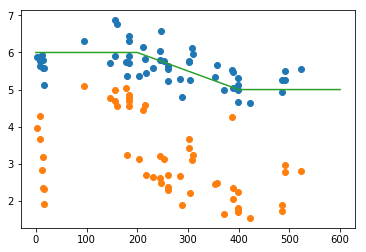

In [19]:
plt.plot(LeafNDataframe.loc[:,'Tt'],LeafNDataframe.loc[:,['Observed.LeafN','Observed.StemN']],'o')
plt.plot([0,200,400,600],[6,6,5,5])


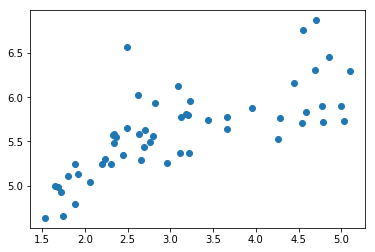

In [20]:
plt.plot(LeafNDataframe.loc[:,['Observed.StemN']],LeafNDataframe.loc[:,['Observed.LeafN']],'o')
#plt.plot([0,200,400,600],[6,6,5,5])


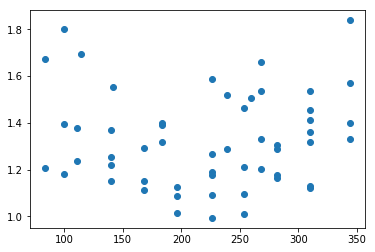

In [21]:
plt.plot(LeafNDataframe.loc[:,'DSWS'],LeafNDataframe.loc[:,['Observed.RootN']],'o')
#plt.plot([0,200,400,600],[6,6,5,5])

In [22]:
IDIndex.loc[IDIndex.Experiment.isin(Includes), 'SimulationName'].values

array(['Iversen_8Waterdry', 'Iversen_8Waterirr',
       'Iversen_9SowingDateSD1Waterdry', 'Iversen_9SowingDateSD2Waterdry',
       'Iversen_9SowingDateSD3Waterdry', 'Iversen_9SowingDateSD4Waterdry',
       'Iversen_9SowingDateSD6Waterdry', 'Iversen_9SowingDateSD7Waterdry',
       'Iversen_9SowingDateSD1Waterirr', 'Iversen_9SowingDateSD2Waterirr',
       'Iversen_9SowingDateSD4Waterirr', 'Iversen_9SowingDateSD3Waterirr',
       'Iversen_9SowingDateSD6Waterirr', 'Iversen_9SowingDateSD7Waterirr',
       'Iversen_91DefoliationSL', 'Iversen_91DefoliationLL',
       'Iversen_91DefoliationSS', 'Iversen_91DefoliationLS',
       'Iversen_121DefoliationSSFDFD2', 'Iversen_121DefoliationLLFDFD2',
       'Iversen_121DefoliationHHFDFD2', 'Iversen_121DefoliationSSFDFD5',
       'Iversen_121DefoliationLLFDFD5', 'Iversen_121DefoliationHHFDFD5',
       'Iversen_121DefoliationSSFDFD10', 'Iversen_121DefoliationLLFDFD10',
       'Iversen_121DefoliationHHFDFD10'], dtype=object)

In [23]:
InculdeTreatments= [ 'Iversen_8Waterirr',
       'Iversen_9SowingDateSD1Waterirr', 'Iversen_9SowingDateSD2Waterirr',
       'Iversen_9SowingDateSD3Waterirr', 'Iversen_9SowingDateSD4Waterirr',
       'Iversen_9SowingDateSD6Waterirr', 'Iversen_9SowingDateSD7Waterirr',
       'Iversen_91DefoliationLL', 'Iversen_91DefoliationSL',
       'Iversen_91DefoliationSS', 'Iversen_91DefoliationLS',
       'Iversen_121DefoliationSSFDFD2', 'Iversen_121DefoliationLLFDFD2',
       'Iversen_121DefoliationHHFDFD2', 'Iversen_121DefoliationSSFDFD5',
       'Iversen_121DefoliationLLFDFD5', 'Iversen_121DefoliationHHFDFD5',
       'Iversen_121DefoliationSSFDFD10', 'Iversen_121DefoliationLLFDFD10',
       'Iversen_121DefoliationHHFDFD10']